In [1]:
#import streamlit as st
import plotly.figure_factory as ff
import numpy as np
import pandas as pd

In [324]:
df = pd.read_csv('C:/Users/efvs/Documents/Residencia Ednael/Repositórios/residencia2/data/fraudes.csv', index_col=[0])

In [4]:
#import streamlit as st

In [3]:
df.head()

,{%} de Ilegalidades,Total de Licitações,Total de Ilegais,Valor Licitado,Valor Ilegal,{%} Valor Ilegal
GO,0.695833,240,167,3.245370e+07,1.978798e+07,0.609730
MT,0.694789,403,280,9.268363e+08,2.966935e+07,0.032011
PB,0.678335,1057,717,5.108516e+08,7.155202e+07,0.140064
RN,0.667060,1694,1130,5.908024e+08,1.262819e+08,0.213746
RR,0.652778,504,329,4.011057e+08,5.468588e+07,0.136338


In [4]:
cont = df.iloc[:,0:3]
valor = df.iloc[:,3:]

<AxesSubplot:>

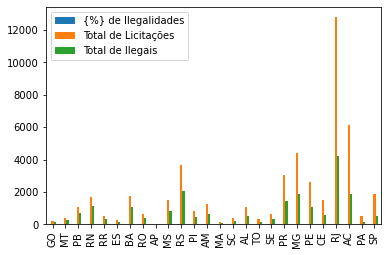

In [7]:
from matplotlib import pyplot as plt
cont.plot.bar()

In [2]:
# DASHBOARD DOS RESULTADOS POR ESTADO
import matplotlib.pyplot as plt
import squarify
import pandas as pd

In [325]:
df = pd.read_csv('C:/Users/efvs/Documents/Residencia Ednael/Repositórios/residencia2/data/fraudes.csv',index_col=[0])

In [19]:
df.head()

,{%} de Ilegalidades,Total de Licitações,Total de Ilegais,Valor Licitado,Valor Ilegal,{%} Valor Ilegal
GO,0.695833,240,167,3.245370e+07,1.978798e+07,0.609730
MT,0.694789,403,280,9.268363e+08,2.966935e+07,0.032011
PB,0.678335,1057,717,5.108516e+08,7.155202e+07,0.140064
RN,0.667060,1694,1130,5.908024e+08,1.262819e+08,0.213746
RR,0.652778,504,329,4.011057e+08,5.468588e+07,0.136338


In [326]:
df2 = df.sort_values(by='Total de Licitações',ascending=False)

(0.0, 100.0, 0.0, 100.0)

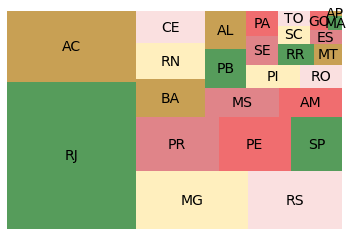

In [71]:
volume = df2['Total de Licitações'].values
labels = df2.index
color_list = ['#0f7216', '#b2790c', '#ffe9a3',
             '#f9d4d4', '#d35158', '#ea3033']

plt.rc('font', size=14)
squarify.plot(sizes=volume, label=labels,
             color=color_list, alpha=0.7)
plt.axis('off')
#st.pyplot()

In [263]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(
    cols = 2, rows = 1,
    column_widths = [0.4, 0.4],
    subplot_titles = ('branchvalues: <b>total<br />&nbsp;<br />', 'branchvalues: <b>total<br />&nbsp;<br />'),
    specs = [[{'type': 'treemap', 'rowspan': 1}, {'type': 'treemap'}]]
)

fig.add_traces(go.Treemap(labels=df.columns,
parents=dados['contagem']['Total de Licitações'].index,
values=dados['contagem']['Total de Licitações'].values))

#,'Total de Ilegais','{%} de Ilegalidades'])


fig.add_traces(go.Treemap(labels=df.columns,
parents=dados['contagem']['Total de Licitações'],
values=dados['contagem']['Total de Licitações'].values))

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

NameError: name 'dados' is not defined

In [334]:
df2

,{%} de Ilegalidades,Total de Licitações,Total de Ilegais,Valor Licitado,Valor Ilegal,{%} Valor Ilegal
RJ,0.3296,12780,4212,9.458141e+09,6.545752e+08,0.0692
AC,0.3011,6148,1851,1.182799e+12,4.434937e+08,0.0004
MG,0.4239,4393,1862,1.913881e+09,1.600558e+08,0.0836
RS,0.5538,3696,2047,2.509245e+09,1.943357e+08,0.0774
PR,0.4778,3022,1444,1.332462e+09,1.157482e+08,0.0869
PE,0.4036,2641,1066,3.249519e+09,1.360687e+08,0.0419
SP,0.2711,1863,505,1.734550e+08,4.566277e+07,0.2633
BA,0.5860,1785,1046,1.656193e+09,2.719578e+08,0.1642
RN,0.6671,1694,1130,5.908024e+08,1.262819e+08,0.2137
CE,0.3870,1504,582,1.816121e+09,5.952300e+07,0.0328


In [331]:
df2['{%} Valor Ilegal']=df2['{%} Valor Ilegal'].round(4)
df2['{%} de Ilegalidades']=df2['{%} de Ilegalidades'].round(4)

In [270]:
import math as mt

In [342]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig2 = make_subplots(rows=1, cols=2)

df_bal=df2.drop(['AC','SE','RJ'],axis=0)
indexes=df_bal.index

fig = go.Figure(data=[
    go.Scatter(name=df_bal.columns[3], x=indexes, 
           y=df_bal['Valor Licitado'].values,mode='lines+markers'
          ),

    go.Bar(name=df_bal.columns[4], 
           x=indexes, y=df_bal['Valor Ilegal'].values,
           text=df_bal['{%} Valor Ilegal'],
           textposition='outside')        
])

# Change the bar mode
fig.update_layout(barmode='group')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [337]:
df.head()

,{%} de Ilegalidades,Total de Licitações,Total de Ilegais,Valor Licitado,Valor Ilegal,{%} Valor Ilegal
GO,0.695833,240,167,3.245370e+07,1.978798e+07,0.609730
MT,0.694789,403,280,9.268363e+08,2.966935e+07,0.032011
PB,0.678335,1057,717,5.108516e+08,7.155202e+07,0.140064
RN,0.667060,1694,1130,5.908024e+08,1.262819e+08,0.213746
RR,0.652778,504,329,4.011057e+08,5.468588e+07,0.136338


In [336]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2,specs=[[{}, {}],
           [{"colspan": 2}, None]])

df_bal=df2.drop(['AC','SE','RJ'],axis=0)
indexes=df_bal.index

#
fig.add_trace(go.Scatter(name=df_bal.columns[3], x=indexes, 
           y=df_bal['Valor Licitado'].values,mode='lines+markers'
          ),2,1)
fig.add_trace(go.Bar(name=df_bal.columns[4], 
           x=indexes, y=df_bal['Valor Ilegal'].values,
           text=df_bal['{%} Valor Ilegal'],
           textposition='outside'        
       ),row=2,col=1)

fig.add_trace(go.Scatter(name=df2.columns[3], x=['SE','RJ'], 
           y=df2['Valor Licitado'][['SE','RJ']].values,mode='lines+markers'
          ),1,1)
fig.add_trace(go.Bar(name=df2.columns[4], 
           x=['SE','RJ'], y=df['Valor Ilegal'][['SE','RJ']].values,
           text=df2['{%} Valor Ilegal'][['SE','RJ']],
           textposition='outside'        
       ),row=1,col=1)

fig.add_trace(go.Scatter(name=df2.columns[3], x=['AC'], 
           y=df2['Valor Licitado'][['AC']].values,mode='lines+markers'
          ),1,2)
fig.add_trace(go.Bar(name=df2.columns[4], 
           x=['AC'], y=df['Valor Ilegal'][['AC']].values,
           text=df2['{%} Valor Ilegal'][['AC']],
           textposition='outside'        
       ),row=1,col=2)

fig.update_layout(barmode='group')
#fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [203]:
import plotly.express as px
 
fig = px.bar(df2,x=df2.index,
            y='Total de Licitações',
            text_auto=True
            )
 #           values='Total de Licitações')
'''fig.update_layout(uniformtext_minsize=14, uniformtext_mode='hide')
fig.update_traces(root_color="lightgrey")
fig.update_layout(
    title_text='KPIs estatais'
)'''
fig.show()

In [174]:
import plotly.express as px
 
fig = px.treemap(dict(df2),path=[df2.index,'Total de Licitações','Total de Ilegais','{%} de Ilegalidades'],
                 values='Total de Licitações',
                 labels='aaaa')
 #           values='Total de Licitações')
fig.update_layout(uniformtext_minsize=14, uniformtext_mode='hide')
fig.update_traces(root_color="lightgrey")
fig.update_layout(
    title_text='KPIs estatais'
)
fig.show()

c:\Users\efvs\miniconda3\envs\rsd\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\efvs\miniconda3\envs\rsd\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\efvs\miniconda3\envs\rsd\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\efvs\miniconda3\envs\rsd\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

